In [1]:
import sys
sys.path.append('./Classes of Analysis plotter/')
from DDPW_FV_NVT import *

/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element EP found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: EP
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader current

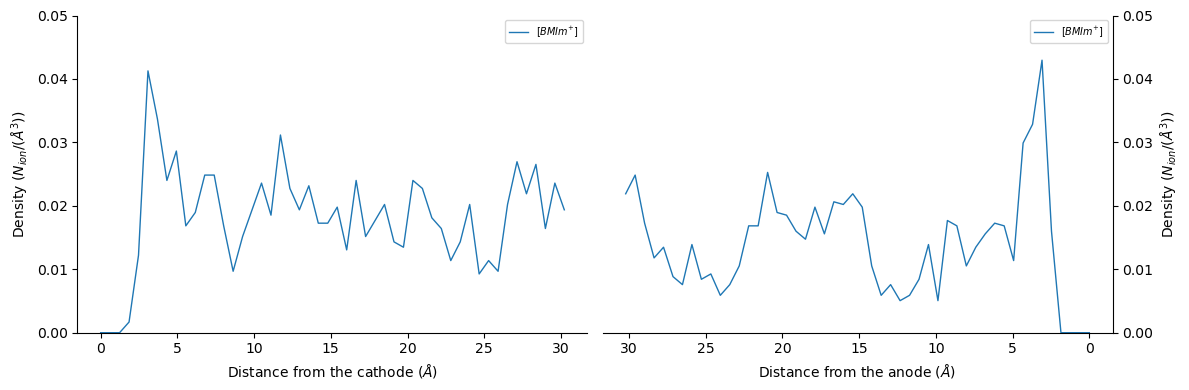

In [2]:
pdb_v0= 'sim_output_v0_ns_0.5/start_drudes_v0.pdb'
dcd_v0= 'sim_output_v0_ns_0.5/FV_NVT_v0.dcd'
u1= mda.Universe(pdb_v0,dcd_v0)
grp_A = u1.select_atoms('resname grp and segid A')
grp_B = u1.select_atoms('resname grp and segid B')
BMI_E = u1.select_atoms('resname BMI and segid E')
grp_AB = grp_A | grp_B
electrode_z_positions = np.array(grp_AB.positions[:, 2])
midpoint = (max(electrode_z_positions) + min(electrode_z_positions)) / 2.0
num_bins = 100

plotter = DensityDistributionPlotter(u1, BMI_E, '$[BMIm^{+}]$' ,electrode_z_positions, num_bins, midpoint)
plotter.plot_density_profiles()

data_directory="density distribution data"
data_file ="BMI.dat"

plotter.write_density(data_directory, data_file )

# Read and extract the data we wrote in the dat file 

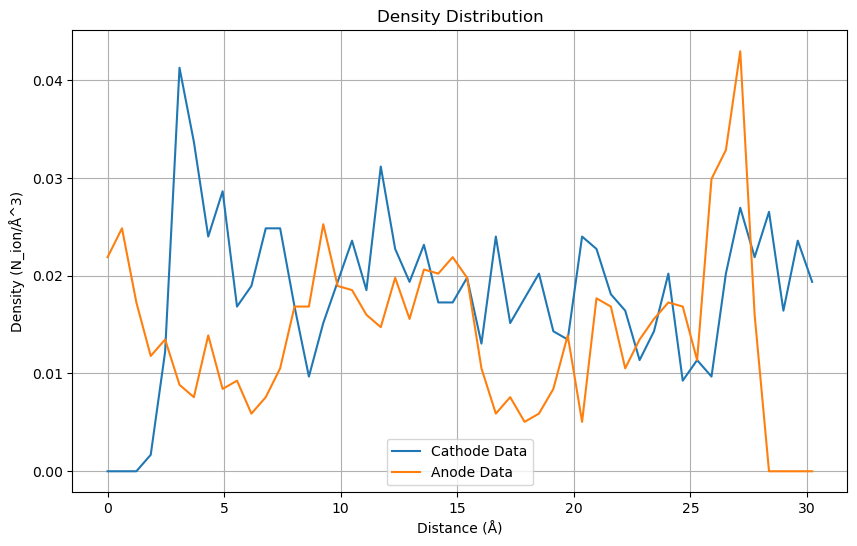

In [3]:
import re
import matplotlib.pyplot as plt

# Define regular expressions for data extraction
data_pattern = r'^([\d.]+)\s+([\d.]+)$'

# Initialize lists to store the extracted data
distance_cathode = []
density_cathode = []
distance_anode = []
density_anode = []
inside_cathode = True  # Assuming cathode data comes first

# Read the data from the file
BMI = 'density distribution data/BMI.dat'
with open(BMI, 'r') as BMI_data:
    for line in BMI_data:
        if "anode" in line:
            inside_cathode = False
            continue  # Skip this line and the rest of the cathode data

        match = re.match(data_pattern, line)
        if match:
            distance, density = map(float, match.groups())
            if inside_cathode:
                distance_cathode.append(distance)
                density_cathode.append(density)
            else:
                distance_anode.append(distance)
                density_anode.append(density)

                
plt.figure(figsize=(10, 6))

plt.plot(distance_cathode, density_cathode, label='Cathode Data')
plt.plot(distance_anode, density_anode, label='Anode Data')
plt.xlabel('Distance (Å)')
plt.ylabel('Density (N_ion/Å^3)')
plt.title('Density Distribution')
plt.legend()
plt.grid(True)
plt.show()


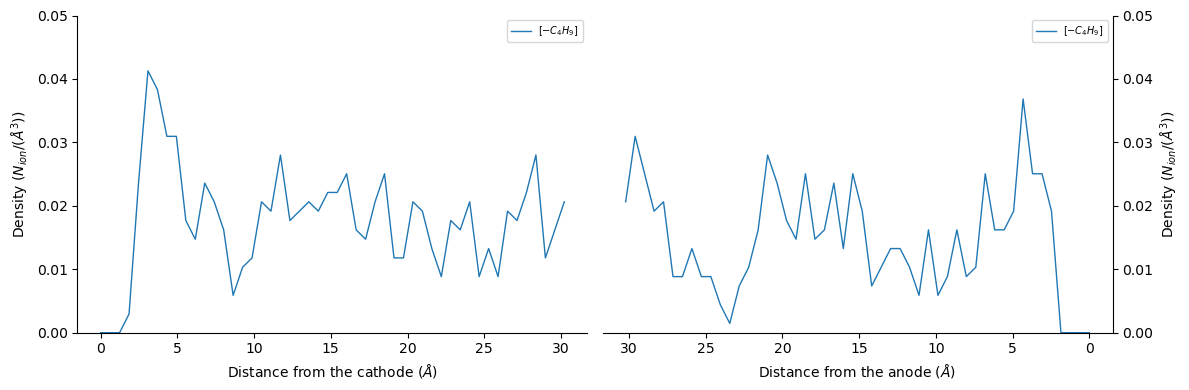

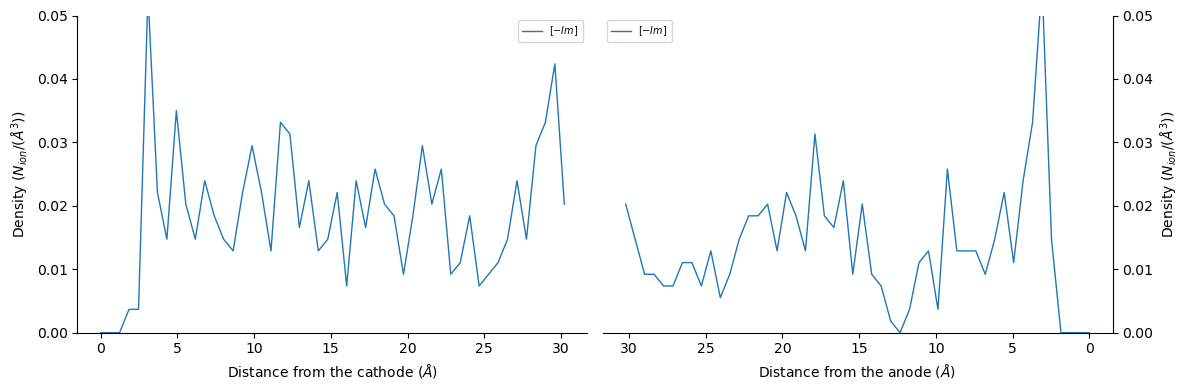

In [4]:
grp_A = u1.select_atoms('resname grp and segid A')
grp_B = u1.select_atoms('resname grp and segid B')
BMI_E1_C4H9 = u1.select_atoms('resname BMI and (name C5 or name H5 or name H51 or name C51 or name H52 or name H53 or name C6 or name H6 or name H61 or name H62)')
BMI_E1_Im = u1.select_atoms('resname BMI and (name N1 or name N11 or name C1 or name H1 or name C2 or name H2 or name C21 or name H21)')
grp_AB = grp_A | grp_B
electrode_z_positions = np.array(grp_AB.positions[:, 2])
midpoint = (max(electrode_z_positions) + min(electrode_z_positions)) / 2.0
num_bins = 100

plotter = DensityDistributionPlotter(u1, BMI_E1_C4H9, "$[-C_{4}H_{9}]$" ,electrode_z_positions, num_bins, midpoint)
plotter.plot_density_profiles()

plotter.write_density("density distribution data", "-C4H9.dat" )

plotter = DensityDistributionPlotter(u1, BMI_E1_Im , "$[-Im]$" ,electrode_z_positions, num_bins, midpoint)
plotter.plot_density_profiles()

plotter.write_density("density distribution data", "-Im.dat" )

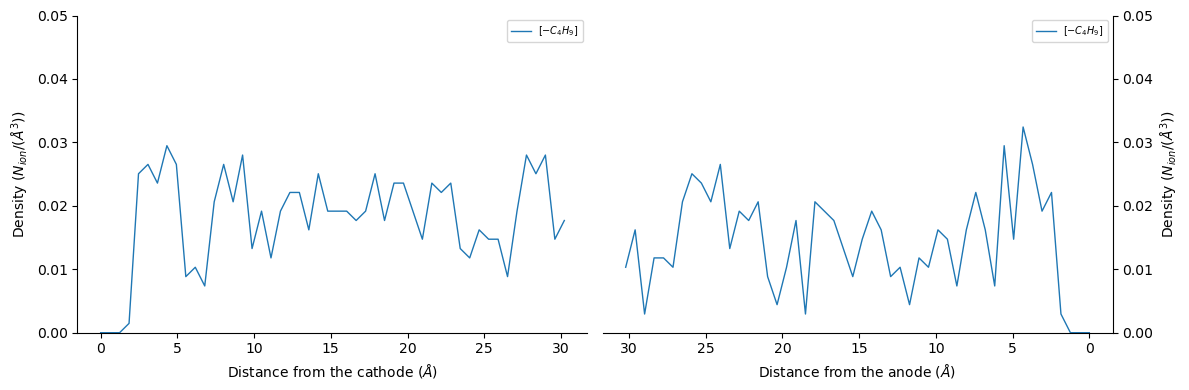

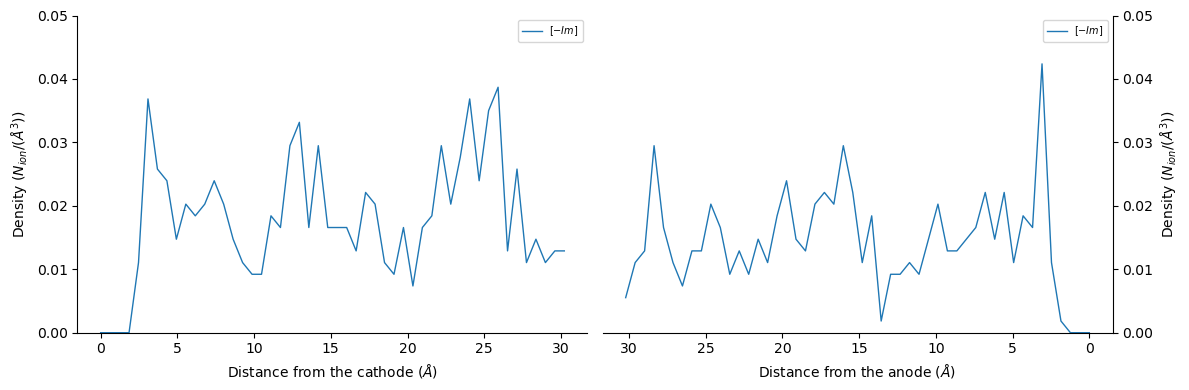

In [5]:
pdb_v3= 'sim_output_v3_ns_0.5/start_drudes_v3_ns_0.5.pdb'
dcd_v3= 'sim_output_v3_ns_0.5/FV_NVT_v3_ns_0.5.dcd'
u2= mda.Universe(pdb_v3,dcd_v3)
grp_A2 = u2.select_atoms('resname grp and segid A')
grp_B2 = u2.select_atoms('resname grp and segid B')
BMI_E2_C4H9 = u2.select_atoms('resname BMI and (name C5 or name H5 or name H51 or name C51 or name H52 or name H53 or name C6 or name H6 or name H61 or name H62)')
BMI_E2_Im = u2.select_atoms('resname BMI and (name N1 or name N11 or name C1 or name H1 or name C2 or name H2 or name C21 or name H21)')
grp_AB2 = grp_A2 | grp_B2
electrode_z_positions = np.array(grp_AB2.positions[:, 2])
midpoint = (max(electrode_z_positions) + min(electrode_z_positions)) / 2.0
num_bins = 100

plotter = DensityDistributionPlotter(u1, BMI_E2_C4H9, "$[-C_{4}H_{9}]$" ,electrode_z_positions, num_bins, midpoint)
plotter.plot_density_profiles()

plotter.write_density("density distribution data", "-C4H9_u2.dat" )

plotter = DensityDistributionPlotter(u1, BMI_E2_Im , "$[-Im]$" ,electrode_z_positions, num_bins, midpoint)
plotter.plot_density_profiles()

plotter.write_density("density distribution data", "-Im_u2.dat" )

## Overlap plots of two functional groups of $[BMI^{+}]$ into one subplot

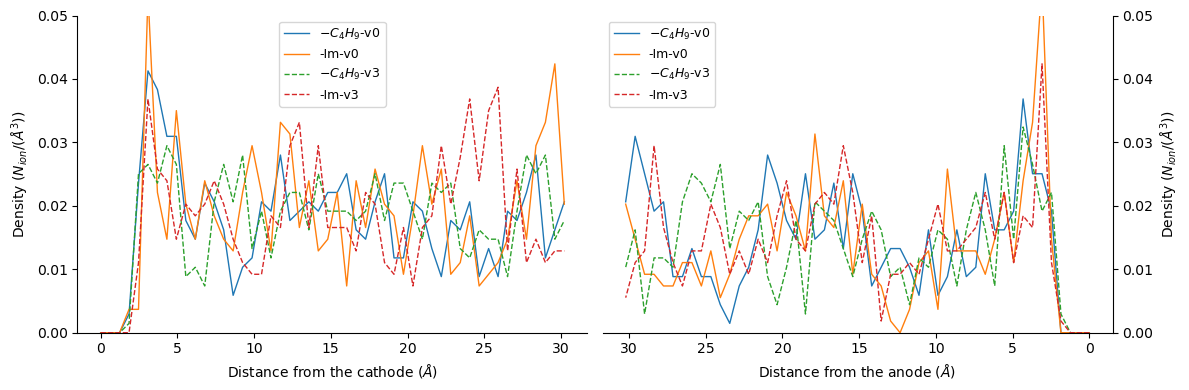

In [11]:
import re
import sys
import matplotlib.pyplot as plt

# Define regular expressions for data extraction
data_pattern = r'^([\d.]+)\s+([\d.]+)$'

# Create lists to store the extracted data for each dataset
datasets = []

# Define labels for each dataset
labels = ['$-C_{4}H_{9}$-v0','-Im-v0','$-C_{4}H_{9}$-v3', '-Im-v3']

linestyles=['-','-','--','--']

# Read the data from the files
files = ['density distribution data/-C4H9.dat', 'density distribution data/-Im.dat'
         ,'density distribution data/-C4H9_u2.dat','density distribution data/-Im_u2.dat']

for file in files:
    inside_cathode = True  # Assuming cathode data comes first
    dataset = {'distance_cathode': [], 'density_cathode': [], 'distance_anode': [], 'density_anode': []}
    datasets.append(dataset)

    with open(file, 'r') as data_file:
        for line in data_file:
            if "anode" in line:
                inside_cathode = False
                continue  # Skip this line and the rest of the cathode data

            match = re.match(data_pattern, line)
            if match:
                distance, density = map(float, match.groups())
                if inside_cathode:
                    dataset['distance_cathode'].append(distance)
                    dataset['density_cathode'].append(density)
                else:
                    dataset['distance_anode'].append(distance)
                    dataset['density_anode'].append(density)

# Create a single subplot to compare the datasets
plt.figure(figsize=(12, 4))
left_subplot = plt.subplot(1, 2, 1)
right_subplot = plt.subplot(1, 2, 2)

# Plot each dataset in the respective subplot
for i, dataset in enumerate(datasets):
    left_subplot.plot(
        dataset['distance_cathode'],
        dataset['density_cathode'],
        lw="1.0",
        label= f'{labels[i]}',
        linestyle= linestyles[i]
    )

    right_subplot.plot(
        dataset['distance_anode'],
        dataset['density_anode'][::-1],
        lw="1.0",
        label=f'{labels[i]}',
        linestyle= linestyles[i]
    )

# Set labels, legends, and other plot settings
left_subplot.set_xlabel("Distance from the cathode ($\AA$)")
left_subplot.set_ylabel("Density $(N_{ion}/(\AA^{3}))$")
left_subplot.set_ylim(0, 0.05)
left_subplot.spines['right'].set_visible(False)
left_subplot.spines['top'].set_visible(False)
left_subplot.legend(fontsize=9)

right_subplot.set_xlabel("Distance from the anode ($\AA$)")
right_subplot.set_ylabel("Density $(N_{ion}/(\AA^{3}))$")
right_subplot.set_ylim(0, 0.05)
right_subplot.spines['left'].set_visible(False)
right_subplot.spines['top'].set_visible(False)
right_subplot.legend(fontsize=9)

plt.gca().invert_xaxis()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.tight_layout()
plt.show()